# Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ruptures as rpt

# Battery B0007

In [ ]:
df = pd.read_csv('C:/Users/ibrah/Desktop/Masters/Dissertation Data Analysis - VS Code/vars_b7.csv')

In [3]:
df.head()

,cycle,cycle_type,cycle_idx,index,type,ambient_temperature,timestamp,Voltage_measured,Current_measured,Temperature_measured,Current,Voltage,Time,Capacity
0,1,1,0,0,charge,24,2008-04-02 13:08:17.921,3.866123,-0.003830,24.434244,-0.0006,0.002,0.000,1.891052
1,1,1,0,1,charge,24,2008-04-02 13:08:17.921,3.644900,-2.261867,24.441053,-2.2697,2.576,2.532,1.891052
2,1,1,0,2,charge,24,2008-04-02 13:08:17.921,4.001099,1.489161,24.445727,1.4995,4.719,5.500,1.891052
3,1,1,0,3,charge,24,2008-04-02 13:08:17.921,4.011041,1.491029,24.459603,1.4995,4.745,8.344,1.891052
4,1,1,0,4,charge,24,2008-04-02 13:08:17.921,4.017485,1.491413,24.458385,1.4995,4.745,11.125,1.891052


In [ ]:
#View only one registry per cycle (charge and discharge)
cycles = df.filter(['cycle','cycle_type','type','timestamp']).drop_duplicates()
cycles

,cycle,cycle_type,type,timestamp
0,1,1,charge,2008-04-02 13:08:17.921
789,2,1,discharge,2008-04-02 15:25:41.593
986,3,2,charge,2008-04-02 16:37:51.984
1926,4,2,discharge,2008-04-02 19:43:48.406
2122,5,3,charge,2008-04-02 20:55:40.812
...,...,...,...,...
583759,334,168,charge,2008-05-26 21:41:33.468
587251,335,167,discharge,2008-05-27 15:52:41.359
587549,336,169,charge,2008-05-27 17:53:59.765
591153,337,168,discharge,2008-05-27 20:45:42.125


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 591458 entries, 0 to 591457
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   cycle                 591458 non-null  int64  
 1   cycle_type            591458 non-null  int64  
 2   cycle_idx             591458 non-null  int64  
 3   index                 591458 non-null  int64  
 4   type                  591458 non-null  object 
 5   ambient_temperature   591458 non-null  int64  
 6   timestamp             591458 non-null  object 
 7   Voltage_measured      591458 non-null  float64
 8   Current_measured      591458 non-null  float64
 9   Temperature_measured  591458 non-null  float64
 10  Current               591458 non-null  float64
 11  Voltage               591458 non-null  float64
 12  Time                  591458 non-null  float64
 13  Capacity              591453 non-null  float64
dtypes: float64(7), int64(5), object(2)
memory usage: 63.

# Charge Cycle Variables

list of charge Variables:
1 Voltage_measured
2 Voltage_time_relationship
3 Current_measured
4 Current_measured_time_relationship
5 Temperature_measured
6 Temperature_measured_time_relationship
7 Current_charge
8 Current_charge_time_relationship
9 Voltage_charge
10 Voltage_charge_time_relationship
11 max_time_per_charge_cycle


In [7]:
# Charge cycles
ch = df.query('type =="charge"')
ch

,cycle,cycle_type,cycle_idx,index,type,ambient_temperature,timestamp,Voltage_measured,Current_measured,Temperature_measured,Current,Voltage,Time,Capacity
0,1,1,0,0,charge,24,2008-04-02 13:08:17.921,3.866123,-0.003830,24.434244,-0.0006,0.002,0.000,1.891052
1,1,1,0,1,charge,24,2008-04-02 13:08:17.921,3.644900,-2.261867,24.441053,-2.2697,2.576,2.532,1.891052
2,1,1,0,2,charge,24,2008-04-02 13:08:17.921,4.001099,1.489161,24.445727,1.4995,4.719,5.500,1.891052
3,1,1,0,3,charge,24,2008-04-02 13:08:17.921,4.011041,1.491029,24.459603,1.4995,4.745,8.344,1.891052
4,1,1,0,4,charge,24,2008-04-02 13:08:17.921,4.017485,1.491413,24.458385,1.4995,4.745,11.125,1.891052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
591453,338,170,615,0,charge,24,2008-05-28 11:09:42.046,0.762597,-0.002687,23.084846,-0.0006,0.002,0.000,NaN
591454,338,170,615,1,charge,24,2008-05-28 11:09:42.046,0.002932,-0.002776,23.087421,0.0000,0.002,2.547,NaN
591455,338,170,615,2,charge,24,2008-05-28 11:09:42.046,4.986821,-0.003091,23.089221,-0.0006,4.998,5.500,NaN
591456,338,170,615,3,charge,24,2008-05-28 11:09:42.046,4.987180,-0.001084,23.085037,-0.0006,4.998,8.312,NaN


In [ ]:
#Delete inconsistent charge cycles (12, 33) 
del_cycles = [12, 33, 170]
ch1 = ch[~ch['cycle_type'].isin(del_cycles)]

## Voltage measured VS Time - Charge

In [9]:
# Group the data by "cycle" and find the maximum voltage measured and its corresponding time
# max_values = ch1.groupby('cycle_type').apply(lambda x: x.loc[x['Voltage_measured'].idxmax()])
max_values = ch1[ch1['Time'] > 1000].groupby('cycle_type').apply(lambda x: x.loc[x['Voltage_measured'].idxmax()])

# Reset the index of the resulting DataFrame
max_values.reset_index(drop=True, inplace=True)

# Extract the maximum voltage measured and time values
max_voltages = max_values['Voltage_measured']
max_time = max_values['Time']

C:\Users\ibrah\AppData\Local\Temp\ipykernel_19944\1385262537.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  max_values = ch1[ch1['Time'] > 1000].groupby('cycle_type').apply(lambda x: x.loc[x['Voltage_measured'].idxmax()])


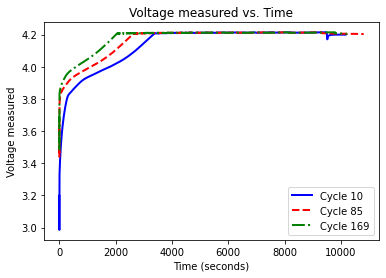

In [10]:
#Plot
# Filter data for each cycle 
cycle_10 = ch1[ch1['cycle_type'] == 10]
cycle_85 = ch1[ch1['cycle_type'] == 85]
cycle_169 = ch1[ch1['cycle_type'] == 169]

# Plot the lines with distinctive styles and colors
plt.plot(cycle_10['Time'], cycle_10['Voltage_measured'], linestyle='-', color='blue', linewidth = 2, label='Cycle 10')
plt.plot(cycle_85['Time'], cycle_85['Voltage_measured'], linestyle='--', color='red', linewidth = 2, label='Cycle 85')
plt.plot(cycle_169['Time'], cycle_169['Voltage_measured'], linestyle='-.', color='green', linewidth = 2, label='Cycle 169')

# Set labels and title
plt.xlabel('Time (seconds)')
plt.ylabel('Voltage measured')
plt.title('Voltage measured vs. Time')

# Add a legend
plt.legend()

# Display the plot
plt.show()

In [11]:
#cycle_type_C = cycle type charge
#Time_VMC = Time voltage measured Charge
#type_C = Type Charge
#Voltage_measured_C
v1v2 = max_values[['cycle_type','type', 'Voltage_measured', 'Time']].copy()
v1v2.rename(columns={'type':'type_C', 'Voltage_measured':'Voltage_measured_C', 'Time':'Time_Voltage_Measured_C'}, inplace=True)
v1v2

,cycle_type,type_C,Voltage_measured_C,Time_Voltage_Measured_C
0,1,charge,4.214724,5571.032
1,2,charge,4.214979,7821.594
2,3,charge,4.214689,7715.609
3,4,charge,4.214773,8414.906
4,5,charge,4.214678,8364.062
...,...,...,...,...
162,165,charge,4.214616,7920.000
163,166,charge,4.214671,9486.250
164,167,charge,4.214632,7066.500
165,168,charge,4.214676,7015.047


In [12]:
#Check data type
v1v2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   cycle_type               167 non-null    int64  
 1   type_C                   167 non-null    object 
 2   Voltage_measured_C       167 non-null    float64
 3   Time_Voltage_Measured_C  167 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 5.3+ KB


## Current Measured vs Time - Charge

In [ ]:
cycle_list = np.arange(1,170).tolist()
for cycle in del_cycles:
    if cycle in cycle_list:
        cycle_list.remove(cycle)

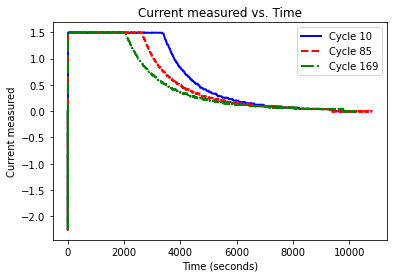

In [14]:
#Plot
# Filter data for each cycle 
cycle_10 = ch1[ch1['cycle_type'] == 10]
cycle_85 = ch1[ch1['cycle_type'] == 85]
cycle_169 = ch1[ch1['cycle_type'] == 169]

# Plot the lines with distinctive styles and colors
plt.plot(cycle_10['Time'], cycle_10['Current_measured'], linestyle='-', color='blue', linewidth = 2, label='Cycle 10')
plt.plot(cycle_85['Time'], cycle_85['Current_measured'], linestyle='--', color='red', linewidth = 2, label='Cycle 85')
plt.plot(cycle_169['Time'], cycle_169['Current_measured'], linestyle='-.', color='green', linewidth = 2, label='Cycle 169')

# Set labels and title
plt.xlabel('Time (seconds)')
plt.ylabel('Current measured')
plt.title('Current measured vs. Time')

# Add a legend
plt.legend()

# Display the plot
plt.show()

In [ ]:
v3v4 = pd.DataFrame(columns=['cycle_type','break_time'])

for idx,c in enumerate(cycle_list):
    # signal
    # *** Removed the first 10 records so that there is only 1 breakpoint ***
    cycle = ch1[ch1['cycle_type'] == c].sort_values(by='index')
    signal = cycle.Current_measured[10:].to_numpy()

    # detection
    algor = rpt.Binseg(model='ar').fit(signal)
    result = algor.predict(n_bkps=1)

    # print Corresponding time
    # *** add the 10 that was removed ***
    change_point_index = 10 + result[0]
    change_point_time = cycle.query('index==@change_point_index').iloc[0,12]

    v3v4.loc[idx,'cycle_type']=c
    bi = 10 + result[0]
    v3v4.loc[idx,'break_time']=cycle.query('index==@change_point_index').iloc[0,12]
    v3v4.loc[idx,'break_current']=cycle.query('index==@change_point_index').iloc[0,8]
    
v3v4.rename(columns={'break_time':'Current_measured_time_C', 'break_current':'Current_measured_C'}, inplace = True)

In [16]:
#Change data type
v3v4['cycle_type'] = v3v4['cycle_type'].astype('int64')
v3v4[['Current_measured_time_C', 'Current_measured_C']] = v3v4[['Current_measured_time_C', 'Current_measured_C']].astype('float64')
v3v4

,cycle_type,Current_measured_time_C,Current_measured_C
0,1,771.282,1.437756
1,2,3422.547,1.447425
2,3,3419.156,1.445469
3,4,3421.593,1.448804
4,5,3420.093,1.449514
...,...,...,...
162,165,2019.094,1.490882
163,166,2021.062,1.464605
164,167,2007.906,1.491060
165,168,1995.594,1.493032


In [17]:
#Check data type
v3v4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 167 entries, 0 to 166
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   cycle_type               167 non-null    int64  
 1   Current_measured_time_C  167 non-null    float64
 2   Current_measured_C       167 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 9.3 KB


## Temperature Measured vs Time - Charge

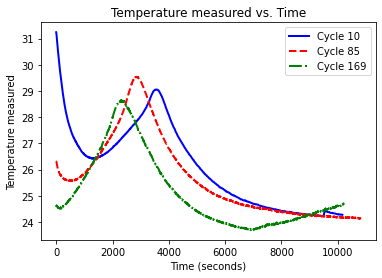

In [18]:
#Plot
# Filter data for each cycle 
cycle_10 = ch1[ch1['cycle_type'] == 10]
cycle_85 = ch1[ch1['cycle_type'] == 85]
cycle_169 = ch1[ch1['cycle_type'] == 169]

# Plot the lines with distinctive styles and colors
plt.plot(cycle_10['Time'], cycle_10['Temperature_measured'], linestyle='-', color='blue', linewidth = 2, label='Cycle 10')
plt.plot(cycle_85['Time'], cycle_85['Temperature_measured'], linestyle='--', color='red', linewidth = 2, label='Cycle 85')
plt.plot(cycle_169['Time'], cycle_169['Temperature_measured'], linestyle='-.', color='green', linewidth = 2, label='Cycle 169')

# Set labels and title
plt.xlabel('Time (seconds)')
plt.ylabel('Temperature measured')
plt.title('Temperature measured vs. Time')

# Add a legend
plt.legend()

# Display the plot
plt.show()

In [19]:
# Group the data by "cycle" and find the maximum temperature measured and its corresponding time
#tm = temperature measured
#Time_TMC = Time temperature meausred
tm = ch1[ch1['Time'] > 1000].groupby('cycle_type').apply(lambda x: x.loc[x['Temperature_measured'].idxmax()])

# Reset the index of the resulting DataFrame
tm.reset_index(drop=True, inplace=True)

# Extract the maximum temperature measured and time values
max_temperature = tm['Temperature_measured']
max_time = tm['Time']

#create new dataframe to store variables
v5v6 = tm[['cycle_type','type', 'Temperature_measured', 'Time']].copy()
v5v6.rename(columns={'type':'type_C','Temperature_measured':'Temperature_measured_C','Time':'Time_temperature_measured_C'}, inplace=True)
v5v6

C:\Users\ibrah\AppData\Local\Temp\ipykernel_19944\3058392733.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tm = ch1[ch1['Time'] > 1000].groupby('cycle_type').apply(lambda x: x.loc[x['Temperature_measured'].idxmax()])


,cycle_type,type_C,Temperature_measured_C,Time_temperature_measured_C
0,1,charge,27.256143,1012.547
1,2,charge,29.133928,3621.594
2,3,charge,29.222061,3604.922
3,4,charge,29.170436,3608.234
4,5,charge,29.065729,3557.468
...,...,...,...,...
162,165,charge,29.021050,2325.594
163,166,charge,29.067549,2318.640
164,167,charge,29.140095,2276.906
165,168,charge,29.162879,2287.109


In [20]:
v5v6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 4 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   cycle_type                   167 non-null    int64  
 1   type_C                       167 non-null    object 
 2   Temperature_measured_C       167 non-null    float64
 3   Time_temperature_measured_C  167 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 5.3+ KB


## Current at Charge vs Time - Charge

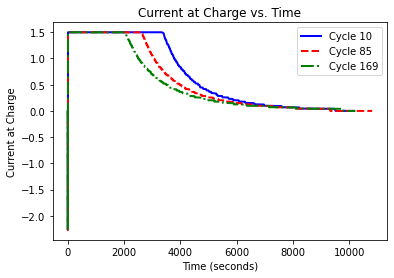

In [21]:
#Plot
# Filter data for each cycle 
cycle_10 = ch1[ch1['cycle_type'] == 10]
cycle_85 = ch1[ch1['cycle_type'] == 85]
cycle_169 = ch1[ch1['cycle_type'] == 169]

# Plot the lines with distinctive styles and colors
plt.plot(cycle_10['Time'], cycle_10['Current'], linestyle='-', color='blue', linewidth = 2, label='Cycle 10')
plt.plot(cycle_85['Time'], cycle_85['Current'], linestyle='--', color='red', linewidth = 2, label='Cycle 85')
plt.plot(cycle_169['Time'], cycle_169['Current'], linestyle='-.', color='green', linewidth = 2, label='Cycle 169')

# Set labels and title
plt.xlabel('Time (seconds)')
plt.ylabel('Current at Charge')
plt.title('Current at Charge vs. Time')

# Add a legend
plt.legend()

# Display the plot
plt.show()

In [ ]:
# Time_CaC = time current at charge
v7v8 = pd.DataFrame(columns=['cycle_type','Time'])

for idx,c in enumerate(cycle_list):
    # signal
    # *** Removed the first 10 records so that there is only 1 breakpoint ***
    cycle = ch1[ch1['cycle_type'] == c].sort_values(by='index')
    signal = cycle.Current[10:].to_numpy()

    # detection
    algor = rpt.Binseg(model='ar').fit(signal)
    result = algor.predict(n_bkps=1)

    # print Corresponding time
    # *** add the 10 that was removed ***
    change_point_index = 10 + result[0]
    change_point_time = cycle.query('index==@change_point_index').iloc[0,12]

    v7v8.loc[idx,'cycle_type']=c
   # v7v8.loc[idx,'break_index']=10 + result[0]
    v7v8.loc[idx,'Time']=cycle.query('index==@change_point_index').iloc[0,12]
    v7v8.loc[idx,'break_current_at_charge']=cycle.query('index==@change_point_index').iloc[0,10]

v7v8.rename(columns={'Time':'Time_current_C', 'break_current_at_charge':'Current_C'},inplace=True)

In [23]:
#Check data type
v7v8.info()

<class 'pandas.core.frame.DataFrame'>
Index: 167 entries, 0 to 166
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   cycle_type      167 non-null    object 
 1   Time_current_C  167 non-null    object 
 2   Current_C       167 non-null    float64
dtypes: float64(1), object(2)
memory usage: 9.3+ KB


In [24]:
#Change data type
v7v8['cycle_type'] = v7v8['cycle_type'].astype('int64')
v7v8['Time_current_C'] = v7v8['Time_current_C'].astype('float64')
v7v8

,cycle_type,Time_current_C,Current_C
0,1,771.282,1.4471
1,2,3422.547,1.4548
2,3,3419.156,1.4564
3,4,3484.406,1.3539
4,5,3420.093,1.4575
...,...,...,...
162,165,2033.344,1.4733
163,166,2035.312,1.4493
164,167,2022.265,1.4771
165,168,2009.859,1.4798


## Voltage at charge vs time - Charge

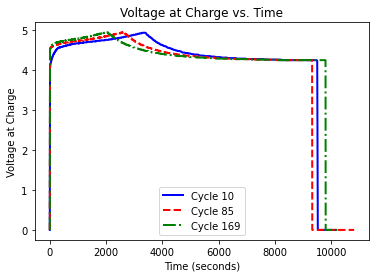

In [25]:
#Plot
# Filter data for each cycle 
cycle_10 = ch1[ch1['cycle_type'] == 10]
cycle_85 = ch1[ch1['cycle_type'] == 85]
cycle_169 = ch1[ch1['cycle_type'] == 169]

# Plot the lines with distinctive styles and colors
plt.plot(cycle_10['Time'], cycle_10['Voltage'], linestyle='-', color='blue', linewidth = 2, label='Cycle 10')
plt.plot(cycle_85['Time'], cycle_85['Voltage'], linestyle='--', color='red', linewidth = 2, label='Cycle 85')
plt.plot(cycle_169['Time'], cycle_169['Voltage'], linestyle='-.', color='green', linewidth = 2, label='Cycle 169')

# Set labels and title
plt.xlabel('Time (seconds)')
plt.ylabel('Voltage at Charge')
plt.title('Voltage at Charge vs. Time')

# Add a legend
plt.legend()

# Display the plot
plt.show()

In [26]:
# Group the data by "cycle" and find the maximum temperature measured and its' corresponding time
#Time_VCC = time voltage at charge - charge
vt = ch1.groupby('cycle_type').apply(lambda x: x.loc[x['Voltage'].idxmax()])

# Reset the index of the resulting DataFrame
vt.reset_index(drop=True, inplace=True)

# Extract the maximum temperature measured and time values
max_voltages = vt['Voltage']
max_time = vt['Time']

#create new dataframe to store variables
v9v10 = vt[['cycle_type','type', 'Voltage', 'Time']].copy()
v9v10.rename(columns={'type':'type_C','Voltage':'Voltage_C','Time':'Time_Voltage_C'}, inplace=True)
v9v10 

C:\Users\ibrah\AppData\Local\Temp\ipykernel_19944\1855440191.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  vt = ch1.groupby('cycle_type').apply(lambda x: x.loc[x['Voltage'].idxmax()])


,cycle_type,type_C,Voltage_C,Time_Voltage_C
0,1,charge,4.935,687.672
1,2,charge,4.935,3277.078
2,3,charge,4.948,3345.234
3,4,charge,4.935,3287.953
4,5,charge,4.935,3275.125
...,...,...,...,...
162,165,charge,4.948,1957.719
163,166,charge,4.948,1950.750
164,167,charge,4.948,1959.937
165,168,charge,4.948,1955.891


In [27]:
#Check data type
v9v10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   cycle_type      167 non-null    int64  
 1   type_C          167 non-null    object 
 2   Voltage_C       167 non-null    float64
 3   Time_Voltage_C  167 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 5.3+ KB


## Total Time per charge cycle

In [28]:
#Total time Charge var
# Group the DataFrame by "cycle" and select the maximum value of "time_seconds"
chr_total_time = ch1.groupby('cycle_type')['Time'].max()

t_tm = []
# Print the maximum time for each cycle
for cycle, chr_total_time in chr_total_time.items():
    Cycle = cycle
    chr_total_time = chr_total_time
    t_tm.append([Cycle,chr_total_time])

v11 = pd.DataFrame(t_tm, columns=['cycle_type', 'Charge Total Time'])
# t_t.rename(columns={'cycle_type':'cycle_type'},inplace=True)
v11

,cycle_type,Charge Total Time
0,1,7597.875
1,2,10516.000
2,3,10484.547
3,4,10397.890
4,5,10495.203
...,...,...
162,165,10154.094
163,166,10316.906
164,167,10571.390
165,168,9892.375


In [29]:
#Check data type
v11.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   cycle_type         167 non-null    int64  
 1   Charge Total Time  167 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 2.7 KB


In [ ]:
#Plot
fig, ax = plt.subplots(1, 1)
ax.plot(v11['cycle_type'], v11['Charge Total Time'])
plt.xlabel('Cycle Type')
plt.ylabel('Charge Total Time')
plt.title('Charge - Total Time vs. Cycle Type')
plt.show()

## Capacity

In [ ]:
#View only one registry per cycle (charge)
cap = ch1.filter(['cycle_type','type','Capacity']).drop_duplicates()
cap

,cycle_type,type,Capacity
0,1,charge,1.891052
986,2,charge,1.880637
2122,3,charge,1.880663
3254,4,charge,1.880771
4381,5,charge,1.879451
...,...,...,...
571895,165,charge,1.406171
575786,166,charge,1.406336
579726,167,charge,1.400455
583759,168,charge,1.421787


## All Charge Variables

In [31]:
merge_= ['cycle_type'] 

In [32]:
acv = pd.merge(v1v2, v3v4[merge_ + ["Current_measured_time_C", "Current_measured_C"]], how = "outer", on="cycle_type")
acv = pd.merge(acv, v5v6[merge_ +['Temperature_measured_C', 'Time_temperature_measured_C']], how = "outer", on="cycle_type")
acv = pd.merge(acv, v7v8[merge_ +['Current_C', 'Time_current_C']], how = "outer", on="cycle_type")
acv = pd.merge(acv, v9v10[merge_ +['Voltage_C', 'Time_Voltage_C']], how = "outer", on="cycle_type")
acv = pd.merge(acv, v11, how = "outer", on="cycle_type")
acv = pd.merge(acv, cap[merge_ +['Capacity']], how = "outer", on = "cycle_type")
acv['new_cycle_type'] = np.arange(1,168)
acv

,cycle_type,type_C,Voltage_measured_C,Time_Voltage_Measured_C,Current_measured_time_C,Current_measured_C,Temperature_measured_C,Time_temperature_measured_C,Current_C,Time_current_C,Voltage_C,Time_Voltage_C,Charge Total Time,Capacity,new_cycle_type
0,1,charge,4.214724,5571.032,771.282,1.437756,27.256143,1012.547,1.4471,771.282,4.935,687.672,7597.875,1.891052,1
1,2,charge,4.214979,7821.594,3422.547,1.447425,29.133928,3621.594,1.4548,3422.547,4.935,3277.078,10516.000,1.880637,2
2,3,charge,4.214689,7715.609,3419.156,1.445469,29.222061,3604.922,1.4564,3419.156,4.948,3345.234,10484.547,1.880663,3
3,4,charge,4.214773,8414.906,3421.593,1.448804,29.170436,3608.234,1.3539,3484.406,4.935,3287.953,10397.890,1.880771,4
4,5,charge,4.214678,8364.062,3420.093,1.449514,29.065729,3557.468,1.4575,3420.093,4.935,3275.125,10495.203,1.879451,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,165,charge,4.214616,7920.000,2019.094,1.490882,29.021050,2325.594,1.4733,2033.344,4.948,1957.719,10154.094,1.406171,163
163,166,charge,4.214671,9486.250,2021.062,1.464605,29.067549,2318.640,1.4493,2035.312,4.948,1950.750,10316.906,1.406336,164
164,167,charge,4.214632,7066.500,2007.906,1.491060,29.140095,2276.906,1.4771,2022.265,4.948,1959.937,10571.390,1.400455,165
165,168,charge,4.214676,7015.047,1995.594,1.493032,29.162879,2287.109,1.4798,2009.859,4.948,1955.891,9892.375,1.421787,166


In [33]:
#Reorganize the columns
last_column = acv.pop(acv.columns[-1])
acv.insert(0, last_column.name, last_column)
acv

,new_cycle_type,cycle_type,type_C,Voltage_measured_C,Time_Voltage_Measured_C,Current_measured_time_C,Current_measured_C,Temperature_measured_C,Time_temperature_measured_C,Current_C,Time_current_C,Voltage_C,Time_Voltage_C,Charge Total Time,Capacity
0,1,1,charge,4.214724,5571.032,771.282,1.437756,27.256143,1012.547,1.4471,771.282,4.935,687.672,7597.875,1.891052
1,2,2,charge,4.214979,7821.594,3422.547,1.447425,29.133928,3621.594,1.4548,3422.547,4.935,3277.078,10516.000,1.880637
2,3,3,charge,4.214689,7715.609,3419.156,1.445469,29.222061,3604.922,1.4564,3419.156,4.948,3345.234,10484.547,1.880663
3,4,4,charge,4.214773,8414.906,3421.593,1.448804,29.170436,3608.234,1.3539,3484.406,4.935,3287.953,10397.890,1.880771
4,5,5,charge,4.214678,8364.062,3420.093,1.449514,29.065729,3557.468,1.4575,3420.093,4.935,3275.125,10495.203,1.879451
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,163,165,charge,4.214616,7920.000,2019.094,1.490882,29.021050,2325.594,1.4733,2033.344,4.948,1957.719,10154.094,1.406171
163,164,166,charge,4.214671,9486.250,2021.062,1.464605,29.067549,2318.640,1.4493,2035.312,4.948,1950.750,10316.906,1.406336
164,165,167,charge,4.214632,7066.500,2007.906,1.491060,29.140095,2276.906,1.4771,2022.265,4.948,1959.937,10571.390,1.400455
165,166,168,charge,4.214676,7015.047,1995.594,1.493032,29.162879,2287.109,1.4798,2009.859,4.948,1955.891,9892.375,1.421787


In [35]:
acv

,new_cycle_type,cycle_type,type_C,Voltage_measured_C,Time_Voltage_Measured_C,Current_measured_time_C,Current_measured_C,Temperature_measured_C,Time_temperature_measured_C,Current_C,Time_current_C,Voltage_C,Time_Voltage_C,Charge Total Time,Capacity
0,1,1,charge,4.214724,5571.032,771.282,1.437756,27.256143,1012.547,1.4471,771.282,4.935,687.672,7597.875,1.891052
1,2,2,charge,4.214979,7821.594,3422.547,1.447425,29.133928,3621.594,1.4548,3422.547,4.935,3277.078,10516.000,1.880637
2,3,3,charge,4.214689,7715.609,3419.156,1.445469,29.222061,3604.922,1.4564,3419.156,4.948,3345.234,10484.547,1.880663
3,4,4,charge,4.214773,8414.906,3421.593,1.448804,29.170436,3608.234,1.3539,3484.406,4.935,3287.953,10397.890,1.880771
4,5,5,charge,4.214678,8364.062,3420.093,1.449514,29.065729,3557.468,1.4575,3420.093,4.935,3275.125,10495.203,1.879451
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,163,165,charge,4.214616,7920.000,2019.094,1.490882,29.021050,2325.594,1.4733,2033.344,4.948,1957.719,10154.094,1.406171
163,164,166,charge,4.214671,9486.250,2021.062,1.464605,29.067549,2318.640,1.4493,2035.312,4.948,1950.750,10316.906,1.406336
164,165,167,charge,4.214632,7066.500,2007.906,1.491060,29.140095,2276.906,1.4771,2022.265,4.948,1959.937,10571.390,1.400455
165,166,168,charge,4.214676,7015.047,1995.594,1.493032,29.162879,2287.109,1.4798,2009.859,4.948,1955.891,9892.375,1.421787


In [36]:
acv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   new_cycle_type               167 non-null    int32  
 1   cycle_type                   167 non-null    int64  
 2   type_C                       167 non-null    object 
 3   Voltage_measured_C           167 non-null    float64
 4   Time_Voltage_Measured_C      167 non-null    float64
 5   Current_measured_time_C      167 non-null    float64
 6   Current_measured_C           167 non-null    float64
 7   Temperature_measured_C       167 non-null    float64
 8   Time_temperature_measured_C  167 non-null    float64
 9   Current_C                    167 non-null    float64
 10  Time_current_C               167 non-null    float64
 11  Voltage_C                    167 non-null    float64
 12  Time_Voltage_C               167 non-null    float64
 13  Charge Total Time   

# Discharge Cycle Variables

In [37]:
ds = df.query("type=='discharge'")

In [38]:
ds

,cycle,cycle_type,cycle_idx,index,type,ambient_temperature,timestamp,Voltage_measured,Current_measured,Temperature_measured,Current,Voltage,Time,Capacity
789,2,1,1,0,discharge,24,2008-04-02 15:25:41.593,4.199360,-0.001866,23.937044,-0.0004,0.000,0.000,1.891052
790,2,1,1,1,discharge,24,2008-04-02 15:25:41.593,4.199497,-0.002139,23.924074,-0.0004,4.215,16.781,1.891052
791,2,1,1,2,discharge,24,2008-04-02 15:25:41.593,3.985606,-1.988778,24.004257,-2.0000,3.003,35.703,1.891052
792,2,1,1,3,discharge,24,2008-04-02 15:25:41.593,3.963247,-1.992558,24.162868,-2.0000,2.987,53.781,1.891052
793,2,1,1,4,discharge,24,2008-04-02 15:25:41.593,3.946647,-1.988491,24.346368,-2.0000,2.972,71.922,1.891052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
591448,337,168,613,295,discharge,24,2008-05-27 20:45:42.125,3.336677,-0.002464,38.744012,0.0006,0.001,2781.312,1.432455
591449,337,168,613,296,discharge,24,2008-05-27 20:45:42.125,3.349952,-0.005358,38.462399,0.0006,0.001,2791.062,1.432455
591450,337,168,613,297,discharge,24,2008-05-27 20:45:42.125,3.362104,-0.003906,38.246805,0.0006,0.001,2800.828,1.432455
591451,337,168,613,298,discharge,24,2008-05-27 20:45:42.125,3.373357,-0.002763,37.970504,0.0006,0.001,2810.640,1.432455


In [ ]:
# #Consider Absolute values for Current values
ds['Current'] = ds['Current'].abs()

C:\Users\ibrah\AppData\Local\Temp\ipykernel_19944\2339098959.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds['Current'] = ds['Current'].abs()


In [ ]:
# Inconsistent discharge cycle 90
del_cycles = [90]
ds1 = ds[~ds['cycle_type'].isin(del_cycles)]

## Voltage measured vs Time - Discharge

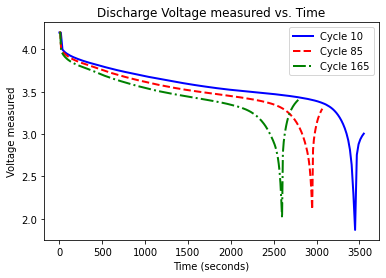

In [41]:
#Plot
# Filter data for each cycle 
cycle_10 = ds1[ds1['cycle_type'] == 10]
cycle_85 = ds1[ds1['cycle_type'] == 85]
cycle_165 = ds1[ds1['cycle_type'] == 165]

# Plot the lines with distinctive styles and colors
plt.plot(cycle_10['Time'], cycle_10['Voltage_measured'], linestyle='-', color='blue', linewidth = 2, label='Cycle 10')
plt.plot(cycle_85['Time'], cycle_85['Voltage_measured'], linestyle='--', color='red', linewidth = 2, label='Cycle 85')
plt.plot(cycle_165['Time'], cycle_165['Voltage_measured'], linestyle='-.', color='green', linewidth = 2, label='Cycle 165')

# Set labels and title
plt.xlabel('Time (seconds)')
plt.ylabel('Voltage measured')
plt.title('Discharge Voltage measured vs. Time')

# Add a legend
plt.legend()

# Display the plot
plt.show()

In [42]:
# Group the data by "cycle" and find the minimum voltage measured and its corresponding time
min_values = ds1.groupby('cycle_type').apply(lambda x: x.loc[x['Voltage_measured'].idxmin()])

# Reset the index of the resulting DataFrame
min_values.reset_index(drop=True, inplace=True)

# Extract the minimum voltage measured and time values
min_voltages = min_values['Voltage_measured']
min_time = max_values['Time']

v12v13 = min_values[['cycle_type','type', 'Voltage_measured', 'Time']].copy()
v12v13.rename(columns={'type':'type_D', 'Voltage_measured':'Voltage_measured_D', 'Time':'Time_voltage_measured_D'}, inplace=True)
v12v13

C:\Users\ibrah\AppData\Local\Temp\ipykernel_19944\403625945.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  min_values = ds1.groupby('cycle_type').apply(lambda x: x.loc[x['Voltage_measured'].idxmin()])


,cycle_type,type_D,Voltage_measured_D,Time_voltage_measured_D
0,1,discharge,2.145976,3487.078
1,2,discharge,2.111017,3468.953
2,3,discharge,2.025109,3468.859
3,4,discharge,1.922542,3469.032
4,5,discharge,1.871159,3466.984
...,...,...,...,...
162,164,discharge,2.132719,2597.500
163,165,discharge,2.011476,2597.703
164,166,discharge,2.161046,2587.016
165,167,discharge,2.014355,2625.672


In [43]:
v12v13.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   cycle_type               167 non-null    int64  
 1   type_D                   167 non-null    object 
 2   Voltage_measured_D       167 non-null    float64
 3   Time_voltage_measured_D  167 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 5.3+ KB


## Current Measured vs Time - Discharge

In [44]:
cycle_list1 = np.arange(1,169).tolist()

In [45]:
for cycle in del_cycles:
    if cycle in cycle_list:
        cycle_list1.remove(cycle)

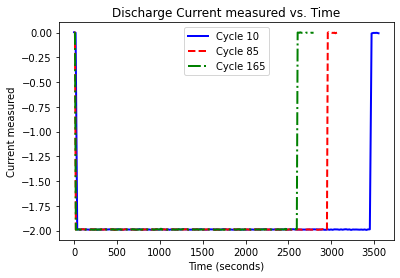

In [46]:
#Plot
# Filter data for each cycle 
cycle_10 = ds1[ds1['cycle_type'] == 10]
cycle_85 = ds1[ds1['cycle_type'] == 85]
cycle_165 = ds1[ds1['cycle_type'] == 165]

# Plot the lines with distinctive styles and colors
plt.plot(cycle_10['Time'], cycle_10['Current_measured'], linestyle='-', color='blue', linewidth = 2, label='Cycle 10')
plt.plot(cycle_85['Time'], cycle_85['Current_measured'], linestyle='--', color='red', linewidth = 2, label='Cycle 85')
plt.plot(cycle_165['Time'], cycle_165['Current_measured'], linestyle='-.', color='green', linewidth = 2, label='Cycle 165')

# Set labels and title
plt.xlabel('Time (seconds)')
plt.ylabel('Current measured')
plt.title('Discharge Current measured vs. Time')

# Add a legend
plt.legend()

# Display the plot
plt.show()

In [ ]:
v14v15 = pd.DataFrame(columns=['cycle_type', 'break_time'])

for idx,c in enumerate(cycle_list1):
    # signal
    # *** Removed the first 10 records so that there is only 1 breakpoint ***
    cycle = ds1[ds1['cycle_type'] == c].sort_values(by='index')
    signal = cycle.Current_measured[10:].to_numpy()

    # detection
    algor = rpt.Binseg(model='ar').fit(signal)
    result = algor.predict(n_bkps=1)

    # print Corresponding time 
    # *** add the 10 that was removed ***
    change_point_index = 10 + result[0]
    change_point_time = cycle.query('index==@change_point_index').iloc[0,12]

    v14v15.loc[idx,'cycle_type']=c
    v14v15.loc[idx,'break_time']=cycle.query('index==@change_point_index').iloc[0,12]
    v14v15.loc[idx,'Current measured']=cycle.query('index==@change_point_index').iloc[0,8]

v14v15.rename(columns={'break_time':'Time_current_measured_D', 'Current measured':'Current_measured_D'}, inplace = True)
v14v15

,cycle_type,Time_current_measured_D,Current_measured_D
0,1,3466.984,-1.987262
1,2,3468.953,-1.989493
2,3,3468.859,-1.990435
3,4,3469.032,-1.989034
4,5,3466.984,-1.989223
...,...,...,...
162,164,2587.859,-1.988424
163,165,2588.015,-1.986910
164,166,2587.016,-1.988688
165,167,2635.516,0.000012


In [48]:
#Change data type
v14v15['cycle_type'] = v14v15['cycle_type'].astype('int64')
v14v15['Time_current_measured_D'] = v14v15['Time_current_measured_D'].astype('float64')
v14v15

,cycle_type,Time_current_measured_D,Current_measured_D
0,1,3466.984,-1.987262
1,2,3468.953,-1.989493
2,3,3468.859,-1.990435
3,4,3469.032,-1.989034
4,5,3466.984,-1.989223
...,...,...,...
162,164,2587.859,-1.988424
163,165,2588.015,-1.986910
164,166,2587.016,-1.988688
165,167,2635.516,0.000012


In [49]:
v14v15.info()

<class 'pandas.core.frame.DataFrame'>
Index: 167 entries, 0 to 166
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   cycle_type               167 non-null    int64  
 1   Time_current_measured_D  167 non-null    float64
 2   Current_measured_D       167 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 9.3 KB


## Temperature Measured vs Time - Discharge

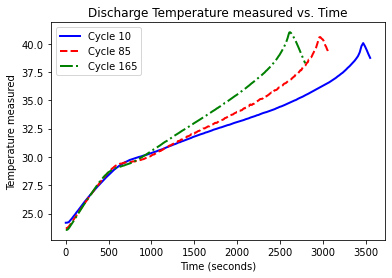

In [50]:
#Plot
# Filter data for each cycle 
cycle_10 = ds1[ds1['cycle_type'] == 10]
cycle_85 = ds1[ds1['cycle_type'] == 85]
cycle_165 = ds1[ds1['cycle_type'] == 165]

# Plot the lines with distinctive styles and colors
plt.plot(cycle_10['Time'], cycle_10['Temperature_measured'], linestyle='-', color='blue', linewidth = 2, label='Cycle 10')
plt.plot(cycle_85['Time'], cycle_85['Temperature_measured'], linestyle='--', color='red', linewidth = 2, label='Cycle 85')
plt.plot(cycle_165['Time'], cycle_165['Temperature_measured'], linestyle='-.', color='green', linewidth = 2, label='Cycle 165')

# Set labels and title
plt.xlabel('Time (seconds)')
plt.ylabel('Temperature measured')
plt.title('Discharge Temperature measured vs. Time')

# Add a legend
plt.legend()

# Display the plot
plt.show()

In [51]:
# Group the data by "cycle" and find the maximum temperature measured and its' corresponding time
tm = ds1[ds1['Time'] > 1000].groupby('cycle_type').apply(lambda x: x.loc[x['Temperature_measured'].idxmax()])

# Reset the index of the resulting DataFrame
tm.reset_index(drop=True, inplace=True)

# Extract the maximum temperature measured and time values
max_temperature = tm['Temperature_measured']
max_time = tm['Time']

#create new dataframe to store variables
v16v17 = tm[['cycle_type','type', 'Temperature_measured', 'Time']].copy()
v16v17.rename(columns={'type':'type_D','Temperature_measured':'Temperature_measured_D','Time':'Time_temperature_measured_D'}, inplace=True)
v16v17

C:\Users\ibrah\AppData\Local\Temp\ipykernel_19944\1663356851.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tm = ds1[ds1['Time'] > 1000].groupby('cycle_type').apply(lambda x: x.loc[x['Temperature_measured'].idxmax()])


,cycle_type,type_D,Temperature_measured_D,Time_temperature_measured_D
0,1,discharge,40.590429,3507.328
1,2,discharge,40.260234,3489.219
2,3,discharge,40.275586,3489.094
3,4,discharge,40.293147,3489.297
4,5,discharge,40.268873,3487.172
...,...,...,...,...
162,164,discharge,40.741759,2617.109
163,165,discharge,41.009644,2617.297
164,166,discharge,40.805587,2606.547
165,167,discharge,40.925860,2645.328


In [52]:
v16v17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 4 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   cycle_type                   167 non-null    int64  
 1   type_D                       167 non-null    object 
 2   Temperature_measured_D       167 non-null    float64
 3   Time_temperature_measured_D  167 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 5.3+ KB


## Current at Charge vs time - Discharge

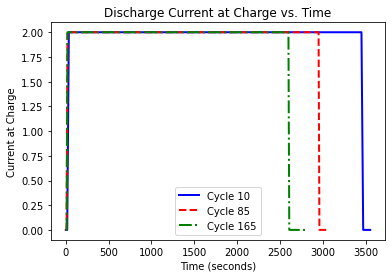

In [53]:
#Plot
# Filter data for each cycle 
cycle_10 = ds1[ds1['cycle_type'] == 10]
cycle_85 = ds1[ds1['cycle_type'] == 85]
cycle_165 = ds1[ds1['cycle_type'] == 165]

# Plot the lines with distinctive styles and colors
plt.plot(cycle_10['Time'], cycle_10['Current'], linestyle='-', color='blue', linewidth = 2, label='Cycle 10')
plt.plot(cycle_85['Time'], cycle_85['Current'], linestyle='--', color='red', linewidth = 2, label='Cycle 85')
plt.plot(cycle_165['Time'], cycle_165['Current'], linestyle='-.', color='green', linewidth = 2, label='Cycle 165')

# Set labels and title
plt.xlabel('Time (seconds)')
plt.ylabel('Current at Charge')
plt.title('Discharge Current at Charge vs. Time')

# Add a legend
plt.legend()

# Display the plot
plt.show()

In [ ]:
v18v19 = pd.DataFrame(columns=['cycle_type','break_time', 'Current'])

for idx,c in enumerate(cycle_list1):
    # signal
    # *** Removed the first 10 records so that there is only 1 breakpoint ***
    cycle = ds1[ds1['cycle_type'] == c].sort_values(by='index')
    signal = cycle.Current[10:].to_numpy()

    # detection
    algor = rpt.Binseg(model='ar').fit(signal)
    result = algor.predict(n_bkps=1)

    # print Corresponding time 
    # *** add the 10 that was removed ***
    change_point_index = 10 + result[0]
    change_point_time = cycle.query('index==@change_point_index').iloc[0,12]

    v18v19.loc[idx,'cycle_type']=c
    v18v19.loc[idx,'break_time']=cycle.query('index==@change_point_index').iloc[0,12]
    v18v19.loc[idx,'Current']=cycle.query('index==@change_point_index').iloc[0,10]

v18v19.rename(columns={'break_time':'Time_current_D', 'Current':'Current_D'},inplace=True)
v18v19

,cycle_type,Time_current_D,Current_D
0,1,3568.062,0.0004
1,2,3570.453,0.0004
2,3,3570.25,0.0006
3,4,3469.032,2.0
4,5,3466.984,2.0
...,...,...,...
162,164,2636.718,0.0006
163,165,2636.922,0.0004
164,166,2635.891,0.0006
165,167,2635.516,0.0006


In [55]:
#Change data type
v18v19['cycle_type'] = v18v19['cycle_type'].astype('int64')
v18v19[['Time_current_D','Current_D']] = v18v19[['Time_current_D','Current_D']] .astype('float64')
v18v19

,cycle_type,Time_current_D,Current_D
0,1,3568.062,0.0004
1,2,3570.453,0.0004
2,3,3570.250,0.0006
3,4,3469.032,2.0000
4,5,3466.984,2.0000
...,...,...,...
162,164,2636.718,0.0006
163,165,2636.922,0.0004
164,166,2635.891,0.0006
165,167,2635.516,0.0006


In [56]:
v18v19.info()

<class 'pandas.core.frame.DataFrame'>
Index: 167 entries, 0 to 166
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   cycle_type      167 non-null    int64  
 1   Time_current_D  167 non-null    float64
 2   Current_D       167 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 9.3 KB


## Voltage at Charge - Discharge

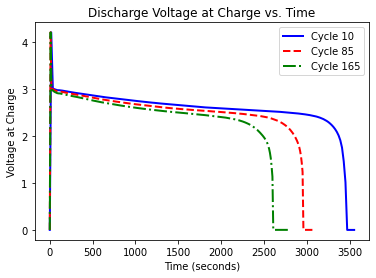

In [57]:
#Plot
# Filter data for each cycle 
cycle_10 = ds1[ds1['cycle_type'] == 10]
cycle_85 = ds1[ds1['cycle_type'] == 85]
cycle_165 = ds1[ds1['cycle_type'] == 165]

# Plot the lines with distinctive styles and colors
plt.plot(cycle_10['Time'], cycle_10['Voltage'], linestyle='-', color='blue', linewidth = 2, label='Cycle 10')
plt.plot(cycle_85['Time'], cycle_85['Voltage'], linestyle='--', color='red', linewidth = 2, label='Cycle 85')
plt.plot(cycle_165['Time'], cycle_165['Voltage'], linestyle='-.', color='green', linewidth = 2, label='Cycle 165')

# Set labels and title
plt.xlabel('Time (seconds)')
plt.ylabel('Voltage at Charge')
plt.title('Discharge Voltage at Charge vs. Time')

# Add a legend
plt.legend()

# Display the plot
plt.show()

In [58]:
# Group the data by "cycle" and find the maximum temperature measured and its' corresponding time
#Time_VCC = time voltage at charge - charge
# vt = ds1.groupby('cycle_type').apply(lambda x: x.loc[x['Voltage'].idxmax()])
vt = ds1[ds1['Time'] > 1000].groupby('cycle_type').apply(lambda x: x.loc[x['Voltage'].idxmin()])
# Reset the index of the resulting DataFrame
vt.reset_index(drop=True, inplace=True)

# Extract the maximum temperature measured and time values
max_voltages = vt['Voltage']
max_time = vt['Time']

#create new dataframe to store variables
v20v21 = vt[['cycle_type','type', 'Voltage', 'Time']].copy()
v20v21.rename(columns={'type':'type_D','Voltage':'Voltage_D','Time':'Time_voltage_D'}, inplace=True)
v20v21 

C:\Users\ibrah\AppData\Local\Temp\ipykernel_19944\1024671055.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  vt = ds1[ds1['Time'] > 1000].groupby('cycle_type').apply(lambda x: x.loc[x['Voltage'].idxmin()])


,cycle_type,type_D,Voltage_D,Time_voltage_D
0,1,discharge,0.000,3507.328
1,2,discharge,0.000,3509.610
2,3,discharge,0.000,3489.094
3,4,discharge,0.000,3489.297
4,5,discharge,0.000,3487.172
...,...,...,...,...
162,164,discharge,0.001,2607.328
163,165,discharge,0.001,2607.484
164,166,discharge,0.001,2596.782
165,167,discharge,0.001,2635.516


In [59]:
v20v21.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   cycle_type      167 non-null    int64  
 1   type_D          167 non-null    object 
 2   Voltage_D       167 non-null    float64
 3   Time_voltage_D  167 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 5.3+ KB


## Total discharge time

In [60]:
# Disharge Total Time
d_total_time = ds1.groupby('cycle_type')['Time'].max()

td_tm = []

# Print the maximum time for each cycle
for cycle, d_total_time in d_total_time.items():
    Cycle = cycle
    d_total_time = d_total_time
    td_tm.append([Cycle,d_total_time])

td_t = pd.DataFrame(td_tm, columns=['cycle_type', 'Discharge Total Time'])

td_t

,cycle_type,Discharge Total Time
0,1,3690.234
1,2,3672.344
2,3,3651.641
3,4,3631.563
4,5,3629.172
...,...,...
162,164,2793.390
163,165,2793.390
164,166,2792.485
165,167,2802.016


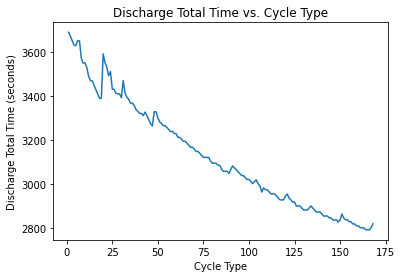

In [ ]:
#Plot
plt.plot(td_t['cycle_type'], td_t['Discharge Total Time'])
plt.xlabel('Cycle Type')
plt.ylabel('Discharge Total Time (seconds)')
plt.title('Discharge Total Time vs. Cycle Type')
plt.show()

## Capacity -Discharge

In [62]:
#View only one registry per cycle (charge and discharge) - Um dos fatores de seleção e eliminação
cap_ = ds1.filter(['cycle_type','type','Capacity']).drop_duplicates()
cap_

,cycle_type,type,Capacity
789,1,discharge,1.891052
1926,2,discharge,1.880637
3059,3,discharge,1.880663
4187,4,discharge,1.880771
5318,5,discharge,1.879451
...,...,...,...
575489,164,discharge,1.406171
579429,165,discharge,1.406336
583462,166,discharge,1.400455
587251,167,discharge,1.421787


## All discharge variables

In [63]:
merge_= ['cycle_type'] 

In [64]:
adv = pd.merge(v12v13, v14v15[merge_ + ["Time_current_measured_D", "Current_measured_D"]], how = "outer", on="cycle_type")
adv = pd.merge(adv, v16v17[merge_ +['Temperature_measured_D', 'Time_temperature_measured_D']], how = "outer", on="cycle_type")
adv = pd.merge(adv, v18v19[merge_ +['Current_D', 'Time_current_D']], how = "outer", on="cycle_type")
adv = pd.merge(adv, v20v21[merge_ +['Voltage_D', 'Time_voltage_D']], how = "outer", on="cycle_type")
adv = pd.merge(adv, td_t[merge_ + ["Discharge Total Time"]], how = "outer", on="cycle_type")
adv['new_cycle_type'] = np.arange(1,168)

In [65]:
#Reorganize the columns
last_column = adv.pop(adv.columns[-1])
adv.insert(0, last_column.name, last_column)
adv

,new_cycle_type,cycle_type,type_D,Voltage_measured_D,Time_voltage_measured_D,Time_current_measured_D,Current_measured_D,Temperature_measured_D,Time_temperature_measured_D,Current_D,Time_current_D,Voltage_D,Time_voltage_D,Discharge Total Time
0,1,1,discharge,2.145976,3487.078,3466.984,-1.987262,40.590429,3507.328,0.0004,3568.062,0.000,3507.328,3690.234
1,2,2,discharge,2.111017,3468.953,3468.953,-1.989493,40.260234,3489.219,0.0004,3570.453,0.000,3509.610,3672.344
2,3,3,discharge,2.025109,3468.859,3468.859,-1.990435,40.275586,3489.094,0.0006,3570.250,0.000,3489.094,3651.641
3,4,4,discharge,1.922542,3469.032,3469.032,-1.989034,40.293147,3489.297,2.0000,3469.032,0.000,3489.297,3631.563
4,5,5,discharge,1.871159,3466.984,3466.984,-1.989223,40.268873,3487.172,2.0000,3466.984,0.000,3487.172,3629.172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,163,164,discharge,2.132719,2597.500,2587.859,-1.988424,40.741759,2617.109,0.0006,2636.718,0.001,2607.328,2793.390
163,164,165,discharge,2.011476,2597.703,2588.015,-1.986910,41.009644,2617.297,0.0004,2636.922,0.001,2607.484,2793.390
164,165,166,discharge,2.161046,2587.016,2587.016,-1.988688,40.805587,2606.547,0.0006,2635.891,0.001,2596.782,2792.485
165,166,167,discharge,2.014355,2625.672,2635.516,0.000012,40.925860,2645.328,0.0006,2635.516,0.001,2635.516,2802.016


# All Variables

In [66]:
av = pd.merge(acv, adv, how = "outer", on = "new_cycle_type")

In [67]:
av

,new_cycle_type,cycle_type_x,type_C,Voltage_measured_C,Time_Voltage_Measured_C,Current_measured_time_C,Current_measured_C,Temperature_measured_C,Time_temperature_measured_C,Current_C,...,Time_voltage_measured_D,Time_current_measured_D,Current_measured_D,Temperature_measured_D,Time_temperature_measured_D,Current_D,Time_current_D,Voltage_D,Time_voltage_D,Discharge Total Time
0,1,1,charge,4.214724,5571.032,771.282,1.437756,27.256143,1012.547,1.4471,...,3487.078,3466.984,-1.987262,40.590429,3507.328,0.0004,3568.062,0.000,3507.328,3690.234
1,2,2,charge,4.214979,7821.594,3422.547,1.447425,29.133928,3621.594,1.4548,...,3468.953,3468.953,-1.989493,40.260234,3489.219,0.0004,3570.453,0.000,3509.610,3672.344
2,3,3,charge,4.214689,7715.609,3419.156,1.445469,29.222061,3604.922,1.4564,...,3468.859,3468.859,-1.990435,40.275586,3489.094,0.0006,3570.250,0.000,3489.094,3651.641
3,4,4,charge,4.214773,8414.906,3421.593,1.448804,29.170436,3608.234,1.3539,...,3469.032,3469.032,-1.989034,40.293147,3489.297,2.0000,3469.032,0.000,3489.297,3631.563
4,5,5,charge,4.214678,8364.062,3420.093,1.449514,29.065729,3557.468,1.4575,...,3466.984,3466.984,-1.989223,40.268873,3487.172,2.0000,3466.984,0.000,3487.172,3629.172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,163,165,charge,4.214616,7920.000,2019.094,1.490882,29.021050,2325.594,1.4733,...,2597.500,2587.859,-1.988424,40.741759,2617.109,0.0006,2636.718,0.001,2607.328,2793.390
163,164,166,charge,4.214671,9486.250,2021.062,1.464605,29.067549,2318.640,1.4493,...,2597.703,2588.015,-1.986910,41.009644,2617.297,0.0004,2636.922,0.001,2607.484,2793.390
164,165,167,charge,4.214632,7066.500,2007.906,1.491060,29.140095,2276.906,1.4771,...,2587.016,2587.016,-1.988688,40.805587,2606.547,0.0006,2635.891,0.001,2596.782,2792.485
165,166,168,charge,4.214676,7015.047,1995.594,1.493032,29.162879,2287.109,1.4798,...,2625.672,2635.516,0.000012,40.925860,2645.328,0.0006,2635.516,0.001,2635.516,2802.016


In [68]:
# column with the name of the cell
av['Battery_id'] = "B0007"

In [69]:
#Reorganize the columns
last_column = av.pop(av.columns[-1])
av.insert(0, last_column.name, last_column)
av

,Battery_id,new_cycle_type,cycle_type_x,type_C,Voltage_measured_C,Time_Voltage_Measured_C,Current_measured_time_C,Current_measured_C,Temperature_measured_C,Time_temperature_measured_C,...,Time_voltage_measured_D,Time_current_measured_D,Current_measured_D,Temperature_measured_D,Time_temperature_measured_D,Current_D,Time_current_D,Voltage_D,Time_voltage_D,Discharge Total Time
0,B0007,1,1,charge,4.214724,5571.032,771.282,1.437756,27.256143,1012.547,...,3487.078,3466.984,-1.987262,40.590429,3507.328,0.0004,3568.062,0.000,3507.328,3690.234
1,B0007,2,2,charge,4.214979,7821.594,3422.547,1.447425,29.133928,3621.594,...,3468.953,3468.953,-1.989493,40.260234,3489.219,0.0004,3570.453,0.000,3509.610,3672.344
2,B0007,3,3,charge,4.214689,7715.609,3419.156,1.445469,29.222061,3604.922,...,3468.859,3468.859,-1.990435,40.275586,3489.094,0.0006,3570.250,0.000,3489.094,3651.641
3,B0007,4,4,charge,4.214773,8414.906,3421.593,1.448804,29.170436,3608.234,...,3469.032,3469.032,-1.989034,40.293147,3489.297,2.0000,3469.032,0.000,3489.297,3631.563
4,B0007,5,5,charge,4.214678,8364.062,3420.093,1.449514,29.065729,3557.468,...,3466.984,3466.984,-1.989223,40.268873,3487.172,2.0000,3466.984,0.000,3487.172,3629.172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,B0007,163,165,charge,4.214616,7920.000,2019.094,1.490882,29.021050,2325.594,...,2597.500,2587.859,-1.988424,40.741759,2617.109,0.0006,2636.718,0.001,2607.328,2793.390
163,B0007,164,166,charge,4.214671,9486.250,2021.062,1.464605,29.067549,2318.640,...,2597.703,2588.015,-1.986910,41.009644,2617.297,0.0004,2636.922,0.001,2607.484,2793.390
164,B0007,165,167,charge,4.214632,7066.500,2007.906,1.491060,29.140095,2276.906,...,2587.016,2587.016,-1.988688,40.805587,2606.547,0.0006,2635.891,0.001,2596.782,2792.485
165,B0007,166,168,charge,4.214676,7015.047,1995.594,1.493032,29.162879,2287.109,...,2625.672,2635.516,0.000012,40.925860,2645.328,0.0006,2635.516,0.001,2635.516,2802.016


## Organise data to save as .xlsx

In [70]:
# drop columns from AV
av = av.drop(columns=['cycle_type_x','cycle_type_y'], axis =1)

In [71]:
# relocate Capacity to the end of the dataframe
last_column = av.pop('Capacity')
av.insert(len(av.columns), last_column.name, last_column)
av

,Battery_id,new_cycle_type,type_C,Voltage_measured_C,Time_Voltage_Measured_C,Current_measured_time_C,Current_measured_C,Temperature_measured_C,Time_temperature_measured_C,Current_C,...,Time_current_measured_D,Current_measured_D,Temperature_measured_D,Time_temperature_measured_D,Current_D,Time_current_D,Voltage_D,Time_voltage_D,Discharge Total Time,Capacity
0,B0007,1,charge,4.214724,5571.032,771.282,1.437756,27.256143,1012.547,1.4471,...,3466.984,-1.987262,40.590429,3507.328,0.0004,3568.062,0.000,3507.328,3690.234,1.891052
1,B0007,2,charge,4.214979,7821.594,3422.547,1.447425,29.133928,3621.594,1.4548,...,3468.953,-1.989493,40.260234,3489.219,0.0004,3570.453,0.000,3509.610,3672.344,1.880637
2,B0007,3,charge,4.214689,7715.609,3419.156,1.445469,29.222061,3604.922,1.4564,...,3468.859,-1.990435,40.275586,3489.094,0.0006,3570.250,0.000,3489.094,3651.641,1.880663
3,B0007,4,charge,4.214773,8414.906,3421.593,1.448804,29.170436,3608.234,1.3539,...,3469.032,-1.989034,40.293147,3489.297,2.0000,3469.032,0.000,3489.297,3631.563,1.880771
4,B0007,5,charge,4.214678,8364.062,3420.093,1.449514,29.065729,3557.468,1.4575,...,3466.984,-1.989223,40.268873,3487.172,2.0000,3466.984,0.000,3487.172,3629.172,1.879451
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,B0007,163,charge,4.214616,7920.000,2019.094,1.490882,29.021050,2325.594,1.4733,...,2587.859,-1.988424,40.741759,2617.109,0.0006,2636.718,0.001,2607.328,2793.390,1.406171
163,B0007,164,charge,4.214671,9486.250,2021.062,1.464605,29.067549,2318.640,1.4493,...,2588.015,-1.986910,41.009644,2617.297,0.0004,2636.922,0.001,2607.484,2793.390,1.406336
164,B0007,165,charge,4.214632,7066.500,2007.906,1.491060,29.140095,2276.906,1.4771,...,2587.016,-1.988688,40.805587,2606.547,0.0006,2635.891,0.001,2596.782,2792.485,1.400455
165,B0007,166,charge,4.214676,7015.047,1995.594,1.493032,29.162879,2287.109,1.4798,...,2635.516,0.000012,40.925860,2645.328,0.0006,2635.516,0.001,2635.516,2802.016,1.421787


# SoH and RUL

In [72]:
# state of health to help calculate the RUL
cap = ch1.filter(['cycle_type','type','Capacity']).drop_duplicates()
cap
av

,Battery_id,new_cycle_type,type_C,Voltage_measured_C,Time_Voltage_Measured_C,Current_measured_time_C,Current_measured_C,Temperature_measured_C,Time_temperature_measured_C,Current_C,...,Time_current_measured_D,Current_measured_D,Temperature_measured_D,Time_temperature_measured_D,Current_D,Time_current_D,Voltage_D,Time_voltage_D,Discharge Total Time,Capacity
0,B0007,1,charge,4.214724,5571.032,771.282,1.437756,27.256143,1012.547,1.4471,...,3466.984,-1.987262,40.590429,3507.328,0.0004,3568.062,0.000,3507.328,3690.234,1.891052
1,B0007,2,charge,4.214979,7821.594,3422.547,1.447425,29.133928,3621.594,1.4548,...,3468.953,-1.989493,40.260234,3489.219,0.0004,3570.453,0.000,3509.610,3672.344,1.880637
2,B0007,3,charge,4.214689,7715.609,3419.156,1.445469,29.222061,3604.922,1.4564,...,3468.859,-1.990435,40.275586,3489.094,0.0006,3570.250,0.000,3489.094,3651.641,1.880663
3,B0007,4,charge,4.214773,8414.906,3421.593,1.448804,29.170436,3608.234,1.3539,...,3469.032,-1.989034,40.293147,3489.297,2.0000,3469.032,0.000,3489.297,3631.563,1.880771
4,B0007,5,charge,4.214678,8364.062,3420.093,1.449514,29.065729,3557.468,1.4575,...,3466.984,-1.989223,40.268873,3487.172,2.0000,3466.984,0.000,3487.172,3629.172,1.879451
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,B0007,163,charge,4.214616,7920.000,2019.094,1.490882,29.021050,2325.594,1.4733,...,2587.859,-1.988424,40.741759,2617.109,0.0006,2636.718,0.001,2607.328,2793.390,1.406171
163,B0007,164,charge,4.214671,9486.250,2021.062,1.464605,29.067549,2318.640,1.4493,...,2588.015,-1.986910,41.009644,2617.297,0.0004,2636.922,0.001,2607.484,2793.390,1.406336
164,B0007,165,charge,4.214632,7066.500,2007.906,1.491060,29.140095,2276.906,1.4771,...,2587.016,-1.988688,40.805587,2606.547,0.0006,2635.891,0.001,2596.782,2792.485,1.400455
165,B0007,166,charge,4.214676,7015.047,1995.594,1.493032,29.162879,2287.109,1.4798,...,2635.516,0.000012,40.925860,2645.328,0.0006,2635.516,0.001,2635.516,2802.016,1.421787


In [73]:
cap1 = av[['new_cycle_type','Capacity']]

In [74]:
cap1.loc[:, 'SoH'] = cap1['Capacity'] / 2
cap1

C:\Users\ibrah\AppData\Local\Temp\ipykernel_19944\2098264456.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cap1.loc[:, 'SoH'] = cap1['Capacity'] / 2


,new_cycle_type,Capacity,SoH
0,1,1.891052,0.945526
1,2,1.880637,0.940319
2,3,1.880663,0.940331
3,4,1.880771,0.940385
4,5,1.879451,0.939725
...,...,...,...
162,163,1.406171,0.703086
163,164,1.406336,0.703168
164,165,1.400455,0.700228
165,166,1.421787,0.710893


In [ ]:
# Define the range of numbers
start_number = 167 
end_number = 0   
step = -1          

# Create the column with the range of numbers
cap1['RUL'] = np.arange(start_number, end_number, step)

C:\Users\ibrah\AppData\Local\Temp\ipykernel_19944\3415426863.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cap1['RUL'] = np.arange(start_number, end_number, step)


In [77]:
cap1

,new_cycle_type,Capacity,SoH,RUL
0,1,1.891052,0.945526,167
1,2,1.880637,0.940319,166
2,3,1.880663,0.940331,165
3,4,1.880771,0.940385,164
4,5,1.879451,0.939725,163
...,...,...,...,...
162,163,1.406171,0.703086,5
163,164,1.406336,0.703168,4
164,165,1.400455,0.700228,3
165,166,1.421787,0.710893,2


In [78]:
#Add SoH and RUL to av
av['SoH'] = cap1['SoH']
av['RUL'] = cap1['RUL']
av

,Battery_id,new_cycle_type,type_C,Voltage_measured_C,Time_Voltage_Measured_C,Current_measured_time_C,Current_measured_C,Temperature_measured_C,Time_temperature_measured_C,Current_C,...,Temperature_measured_D,Time_temperature_measured_D,Current_D,Time_current_D,Voltage_D,Time_voltage_D,Discharge Total Time,Capacity,SoH,RUL
0,B0007,1,charge,4.214724,5571.032,771.282,1.437756,27.256143,1012.547,1.4471,...,40.590429,3507.328,0.0004,3568.062,0.000,3507.328,3690.234,1.891052,0.945526,167
1,B0007,2,charge,4.214979,7821.594,3422.547,1.447425,29.133928,3621.594,1.4548,...,40.260234,3489.219,0.0004,3570.453,0.000,3509.610,3672.344,1.880637,0.940319,166
2,B0007,3,charge,4.214689,7715.609,3419.156,1.445469,29.222061,3604.922,1.4564,...,40.275586,3489.094,0.0006,3570.250,0.000,3489.094,3651.641,1.880663,0.940331,165
3,B0007,4,charge,4.214773,8414.906,3421.593,1.448804,29.170436,3608.234,1.3539,...,40.293147,3489.297,2.0000,3469.032,0.000,3489.297,3631.563,1.880771,0.940385,164
4,B0007,5,charge,4.214678,8364.062,3420.093,1.449514,29.065729,3557.468,1.4575,...,40.268873,3487.172,2.0000,3466.984,0.000,3487.172,3629.172,1.879451,0.939725,163
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,B0007,163,charge,4.214616,7920.000,2019.094,1.490882,29.021050,2325.594,1.4733,...,40.741759,2617.109,0.0006,2636.718,0.001,2607.328,2793.390,1.406171,0.703086,5
163,B0007,164,charge,4.214671,9486.250,2021.062,1.464605,29.067549,2318.640,1.4493,...,41.009644,2617.297,0.0004,2636.922,0.001,2607.484,2793.390,1.406336,0.703168,4
164,B0007,165,charge,4.214632,7066.500,2007.906,1.491060,29.140095,2276.906,1.4771,...,40.805587,2606.547,0.0006,2635.891,0.001,2596.782,2792.485,1.400455,0.700228,3
165,B0007,166,charge,4.214676,7015.047,1995.594,1.493032,29.162879,2287.109,1.4798,...,40.925860,2645.328,0.0006,2635.516,0.001,2635.516,2802.016,1.421787,0.710893,2


# Save to excel

In [81]:
av.to_excel("AV_b07.xlsx", index=False)